<a href="https://colab.research.google.com/github/jayesh1302/Python_learning/blob/master/Week_3_Python_Notebook_(to_be_continued).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Statistics. Case Study 1 on Classification.

In [0]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os

In [0]:
# code for getting multiple outputs from a jupyter cell using core.interactiveshell module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
# Giving the path where file is available
#os.chdir('/Users/apple/Documents/W3/Docs and PPT/Titanic')

In [0]:
titanic = pd.read_csv("Titanic_Dataset.csv")
# Dataset Reference: https://www.kaggle.com/c/titanic/data
# Backgroud: Titanic ship sank after colliding with an iceberg in 1912.
# Out of 2204 passengers and crew, 1502 (68%) were not able to survive

#### Data Dictionary
![image.png](attachment:image.png)

#### How data looks in excel (1st 10 rows)
![image.png](attachment:image.png)

In [74]:
titanic.shape

(891, 12)

In [75]:
# Display top 3 rows
titanic.head(3)
# Example of categorical variables: Gender, Survived, Pclass (Qualitative)
# Example of numerical variables: Age, Fare

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
# Getting info of non-null objects
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
round(titanic.describe(include = 'all', percentiles=[0.01,0.1,0.25,0.75,0.99]))

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.0,891.0,891.0,891,891.0,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Murdlin, Mr. Joseph",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.0,2.0,NaN,NaN,30.0,1.0,0.0,NaN,32.0,NaN,NaN
std,257.0,0.0,1.0,NaN,NaN,15.0,1.0,1.0,NaN,50.0,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
1%,10.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN
10%,90.0,0.0,1.0,NaN,NaN,14.0,0.0,0.0,NaN,8.0,NaN,NaN
25%,224.0,0.0,2.0,NaN,NaN,20.0,0.0,0.0,NaN,8.0,NaN,NaN


## Statistics

#### Measuring central tendency: Calculating mean, mode, median

In [79]:
# Mean: Average value of a column
titanic.Fare.sum()/len(titanic.Fare)
np.mean(titanic.Fare)
titanic.Fare.mean()

32.204207968574636

32.2042079685746

32.2042079685746

In [80]:
# Median: middle value after sorting the column
titanic.Fare.median()

14.4542

In [81]:
# Mode: Value that appears most frequently in the data
titanic.Fare.mode()
titanic.Fare.value_counts()

0    8.05
dtype: float64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

#### Measuring the spread: Standard Deviation, variance, histogram

In [82]:
titanic.Fare.std()

49.693428597180905

In [83]:
titanic.Fare.var()

2469.436845743117

In [84]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

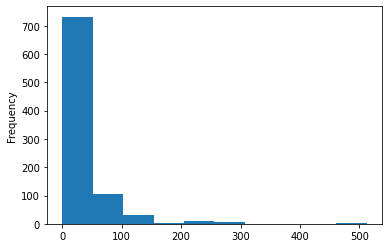

In [86]:
# distribution
titanic.Fare.plot.hist()

## Case Study 1: Classification

In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
titanic.Age.isnull().sum()

177

In [89]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
 # Drop unnecessary columns or columns with lot of missing values
titanic = titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'], axis=1)

In [0]:
# Replace missing value in age with 
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [93]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [94]:
 titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [0]:
# Change gender variable to have numeric values
titanic['Gender'].replace(['male','female'],[0,1],inplace=True)

In [97]:
titanic.head()
titanic.shape

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


(891, 7)

In [0]:
# importing the libraries to split the data and Splitting the data
from sklearn.model_selection import train_test_split #training and testing data split

train,test = train_test_split(titanic, test_size=0.3, random_state=0, stratify=titanic['Survived'])

In [99]:
train.shape
test.shape

(623, 7)

(268, 7)

In [100]:
268/891

0.30078563411896747

In [101]:
train.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
231,0,3,0,29.000000,0,0,7.7750
836,0,3,0,21.000000,0,0,8.6625
639,0,3,0,29.699118,1,0,16.1000


In [102]:
train.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [0]:
# separating dependent and independent variables
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

In [104]:
train_X.head()
train_Y.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
231,3,0,29.000000,0,0,7.7750
836,3,0,21.000000,0,0,8.6625
639,3,0,29.699118,1,0,16.1000
389,2,1,17.000000,0,0,12.0000
597,3,0,49.000000,0,0,0.0000


,Survived
231,0
836,0
639,0
389,1
597,0


In [0]:
# Importing and applying logistic regression model
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [106]:
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
test_X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
421,3,0,21.0,0,0,7.7333
618,2,1,4.0,2,1,39.0000
116,3,0,70.5,0,0,7.7500
310,1,1,24.0,0,0,83.1583
57,3,0,28.5,0,0,7.2292


In [0]:
predictions=model.predict(test_X)

In [109]:
test_X.shape

(268, 6)

In [110]:
predictions

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1])

In [0]:
# Importing libraries for evaluation metrics
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [112]:
test_Y.head()

,Survived
421,0
618,1
116,0
310,1
57,0


In [113]:
metrics.accuracy_score(test_Y,predictions)

0.8246268656716418

In [114]:
metrics.precision_score(test_Y,predictions)

0.8181818181818182

In [115]:
metrics.recall_score(test_Y,predictions)

0.6990291262135923

In [116]:
pd.DataFrame(confusion_matrix(test_Y,predictions),\
            columns=["Predicted No", "Predicted Yes"],\
            index=["Actual No","Actual yes"] )

,Predicted No,Predicted Yes
Actual No,149,16
Actual yes,31,72


In [117]:
# Accuracy
(150+69)/(150+15+34+69)

0.8171641791044776

In [118]:
# Precision
69/(15+69)

0.8214285714285714

In [119]:
# Recall
69/(34+69)

0.6699029126213593